<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

Using Object Oriented (OO) interface.

# 1 Some nomenclature

Distinguish between figure and axis:
- Figure is full canvas for drawing graphs etc..
- Axis is individual mathematical axes for plotting.

# 2 Comparing the two ‘dialects’

In [7]:
import numpy as np
from matplotlib import pyplot as plt

x=np.linspace(-np.pi,np.pi,num=100)
cos_x=np.cos(x)
sin_x=np.sin(x)

### pyplot Interface

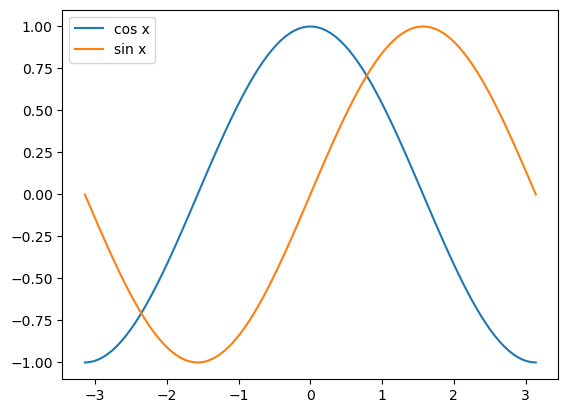

In [8]:
plt.plot(x,cos_x,label='cos x')
plt.plot(x,sin_x,label='sin x')
plt.legend()

For quick and dirty plots.

### OO Interface

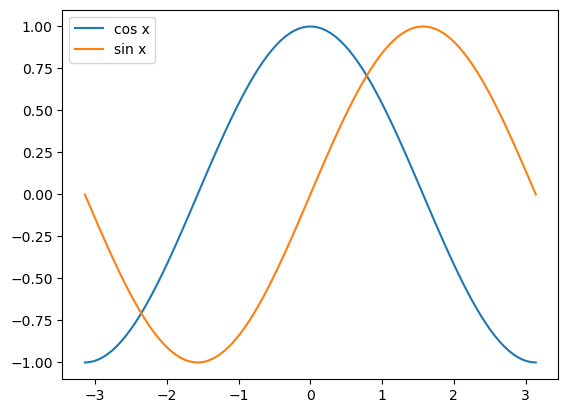

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.plot(x,cos_x,label='cos x')
ax.plot(x,sin_x,label='sin x')
ax.legend()

Use `subplots()` to give figure (`fig`) and axis (`ax`).\
For more complex plots that demand control and finesse.

# 3 What is OO ax, really?

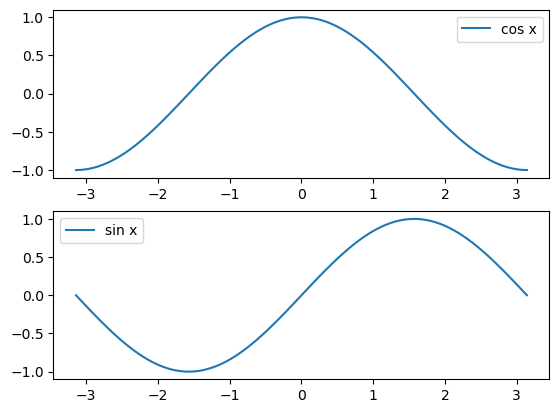

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=1)

ax[0].plot(x,cos_x,label='cos x')
ax[1].plot(x,sin_x,label='sin x')

ax[0].legend()
ax[1].legend()

Asks for 2 rows (`nrows=2`) and 1 column (`ncols=1`) using `subplots()`.

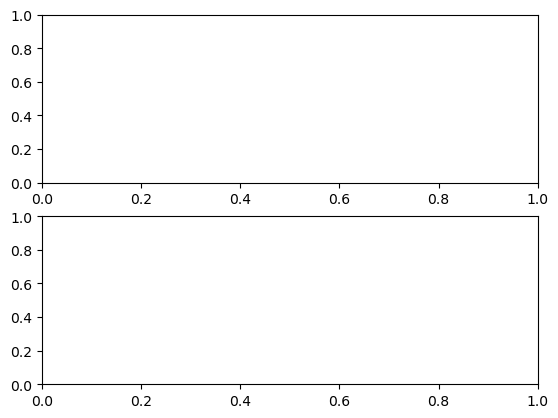

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=1)

Gives 2 axes to plot in both panes.

What is `ax`?

In [13]:
type(ax)

numpy.ndarray

`ax` is NumPy array.

What size is `ax`?

In [14]:
ax.shape

(2,)

`ax` has 2 'things'.

What is contained in `ax`?

In [15]:
type(ax[0])

matplotlib.axes._axes.Axes

Matplotlib axis.

# 4 A complete OO example

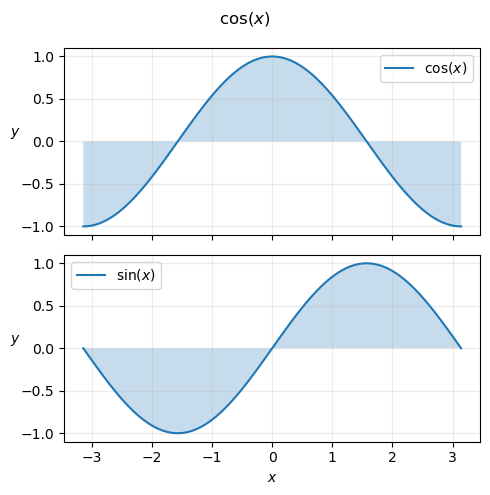

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(5,5),sharex=True)
ax[0].plot(x,cos_x,label=r'$\cos(x)$')
ax[0].fill_between(x,0,cos_x,alpha=.25)
ax[1].plot(x,sin_x,label=r'$\sin(x)$')
ax[1].fill_between(x,0,sin_x,alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$',rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$' and r'$\cos(x)$')
fig.tight_layout()

Set up axes and figure:
- 2 axes for plotting, 2 rows and 1 column.
- Change figure size: `figsize`.
- Ask plots to share x-axis using `sharex`.

Since `ax` is NumPy array with 2 axes, can index with `0` and `1`, then `plot` to axis.\
Use `fill_between()` to fill plots; can be likewise indexed.

Draw legends:
- Use `for` loop that iterates through items in `ax`.
- Add grid to each plot.
- Set label.

Since sharing x-axis, only need label lowest plot (index 1).\
Add super title to **figure** (not plot).\
Make necessary adjustments for plot to look nice with `tight_layout()`.

Different function names between `pyplot` and OO interfaces:
- `pyplot`: `xlabel()`.
- OO: `sex_xlabel()`.

# 5 Multiple rows and columns

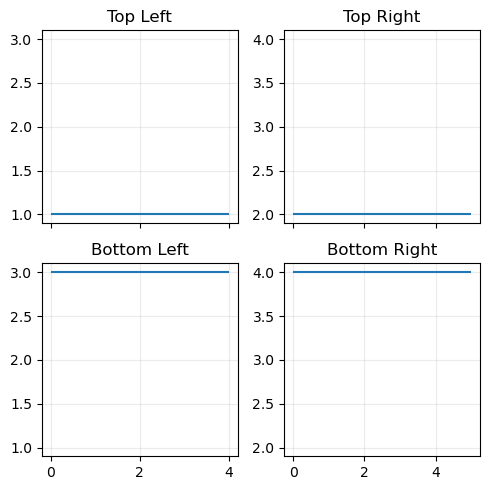

In [40]:
fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(5,5),sharex='col',sharey='col')

# Improves readability.
top_left,top_right,bottom_left,bottom_right=ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1,xmin=0,xmax=4)
top_right.hlines(y=2,xmin=0,xmax=5)
bottom_left.hlines(y=3,xmin=0,xmax=4)
bottom_right.hlines(y=4,xmin=0,xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

Look at how `ax` is structured via its shape.

In [18]:
ax.shape

(2, 2)

Organised as 2 by 2 array.

Can be accessed as follows:

In [30]:
ax[0,0].set_title('Top Left')

Text(0.5, 1.0, 'Top Left')

In [25]:
ax[0,1].set_title('Top Right')

Text(0.5, 1.0, 'Top Right')

In [24]:
ax[1,0].set_title('Bottom Left')

Text(0.5, 1.0, 'Bottom Left')

In [23]:
ax[1,1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

Use familiar variable:

In [28]:
top_left=ax[0,0]
top_right=ax[0,1]
bottom_left=ax[1,0]
bottom_rght=ax[1,1]

Use `ax.flatten()`:

In [29]:
top_left,top_right,bottom_left,bottom_right=ax.flatten()

`flatten()` takes 2D array and 'flattens' it into 1D array.\
Unpacking takes care of assignments.

Using `hlines()` to draw lines:

In [39]:
top_left.hlines(y=1,xmin=0,xmax=5)
top_right.hlines(y=2,xmin=0,xmax=5)
bottom_left.hlines(y=3,xmin=0,xmax=5)
bottom_right.hlines(y=4,xmin=0,xmax=5)

## 5.1 Sharing axes

Share axes with `sharex` and `sharey`.

If axes not shared, Matplotlib will auto-scale both axes.\
Ways to specify how to share axes:
|Option|Result|
|:-:|:-|
|`True`|Makes **all** axes use same range.|
|`col`|Use same range for all columns.|
|`row`|Use same range for all rows.|

## 5.2 Accessing all axes

Using `for` loop to apply changes to all axes.

# 6 Other useful plots

Useful plots from Matplotlib.\
Different plotting styles.

## 6.1 Histograms

Used to show distribution of data.

### Data

Links to data files:
- All: https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv.
- NUS only: https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv.

### A quick helper function

In [47]:
def get_plot_data():
    data={}
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All']=np.loadtxt(filename,skiprows=1)

    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS']=np.loadtxt(filename,skiprows=1)

    return data

Create function `det_plot_data()` to help read file multiple times.

### The histogram

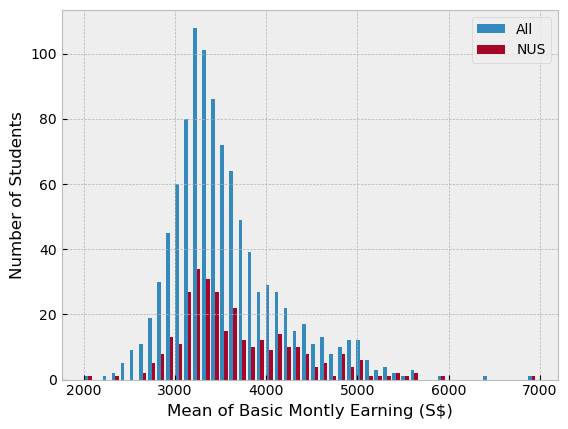

In [49]:
plt.style.use('bmh')
data=get_plot_data()

plt.hist([data['All'],data['NUS']],bins=50,label=['All','NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

Bins specify how many bins to split data.

## 6.2 Scatter plots

Created by putting marker at $(x,y)$ point specified.\
Used `range()` with `lens()` to generate appropriate list for dataset.

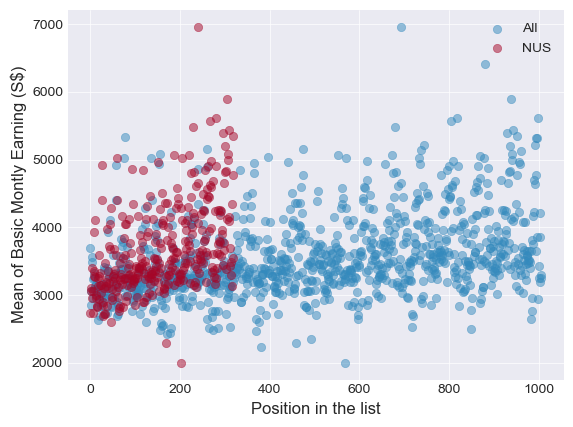

In [50]:
plt.style.use("seaborn-v0_8-darkgrid")

data=get_plot_data()

for label, numbers in data.items():
    x=range(len(numbers))
    y=numbers
    plt.scatter(x,y,label=label,alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Earning (S$)')
plt.legend()

## 6.3 Bar charts

Used dummy data.\
Extracted and typecast to pass 2 lists to `bar()`.\
Use `barh()` for horizontal bars.

Text(0, 0.5, 'Number of Students')

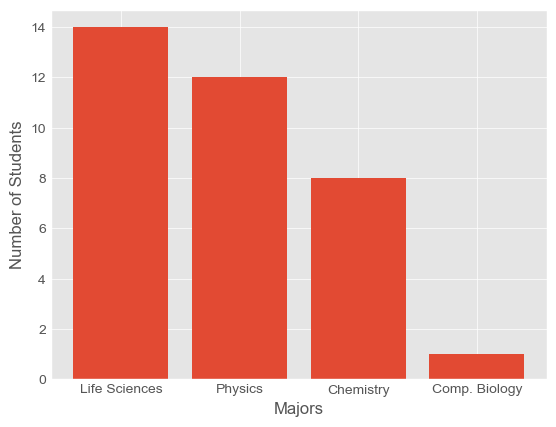

In [51]:
student_numbers={'Life Sciences':14,
                 'Physics':12,
                 'Chemistry':8,
                 'Comp. Biology':1}
majors=list(student_numbers.keys())
numbers=list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors,numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Reused data from dummy class.

Text(0.5, 1.0, 'Percentage of each major')

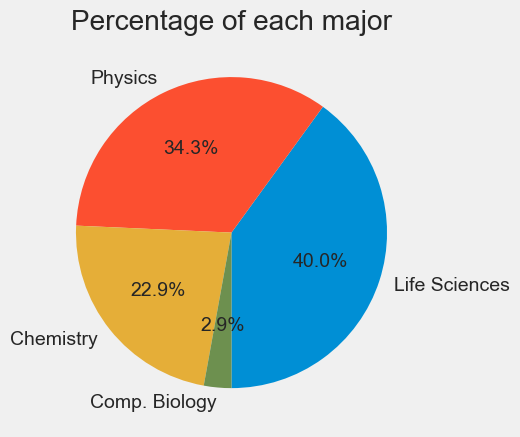

In [52]:
student_numbers={'Life Sciences':14,
                 'Physics':12,
                 'Chemistry':8,
                 'Comp. Biology':1}
majors=list(student_numbers.keys())
numbers=list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers,labels=majors,autopct='%1.1f%%',startangle=-90)
plt.title('Percentage of each major')

Format percentages: `%1.1f%%`.